# REAL RACING 3 VEHICLES - DATA ANALYSIS

# PART 2 (Revision 4)

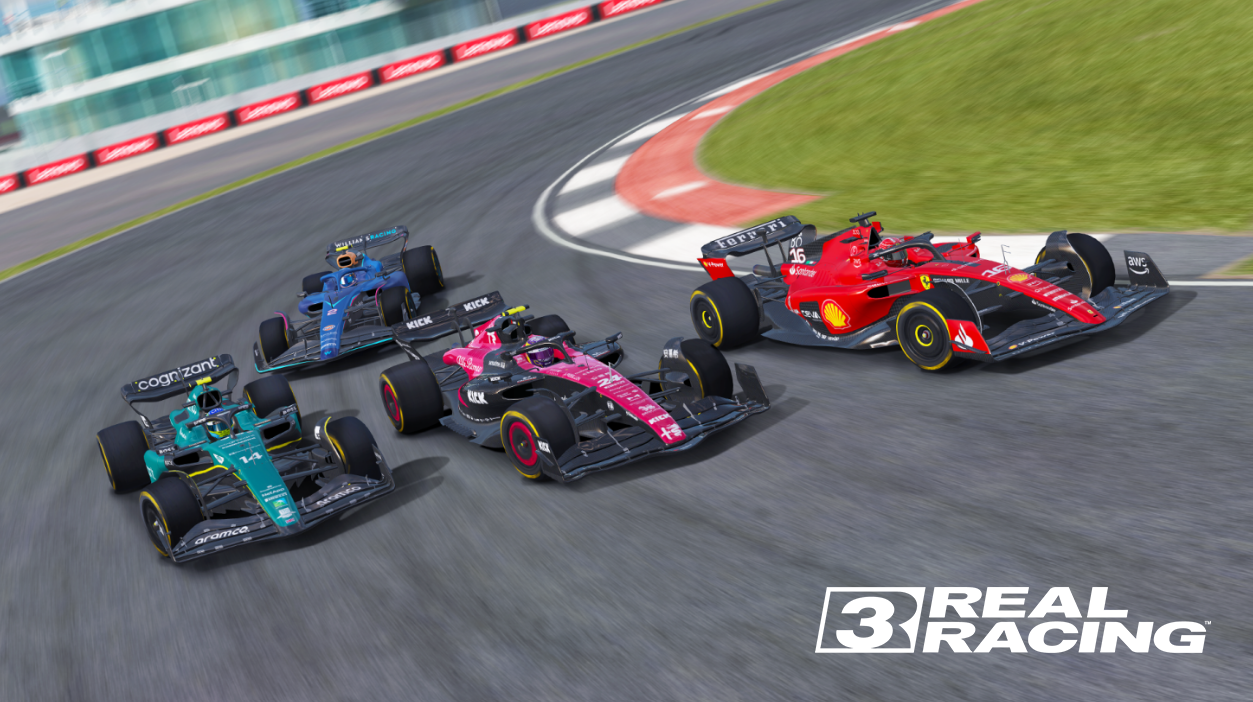

### **Welcome to my 2nd part of data analyses for Real Racing 3 Vehicles!**

_This is the 4th revision of 2nd part for up-to-date analyses, based on **game version 12.6**._

_As always, let's import all necessary modules and load our vehicle dataset first:_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
rr3_df = pd.read_csv('real_racing_3_vehicles_v12_6.csv')

**Important:** It seems that GitHub causes some tables to have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the dataset during rendering. To avoid this issue, all values in `Price` that contain `$` should be changed before the analyses begin.

In [3]:
for i in range(len(rr3_df)):
    if type(rr3_df.loc[i, 'Price']) != float and rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

Before the start, let me check the first and last few lines of the vehicle dataset...

In [4]:
rr3_df.head(8)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
0,Acura,NSX (2017),46.7,306,3.10,31.7,1.09,S,M4,2,450 Gold,180,1665,Yes,No,No,Yes,Yes,No
1,Acura,NSX Type S,48.9,307,2.90,32.0,1.10,S,M4,1,600 Gold,180,1812,Yes,No,No,No,No,Yes
2,Acura,NSX GT3,65.2,274,3.02,29.6,1.65,R,MR,2,750 Gold,180,1990,Yes,No,No,No,No,No
3,Acura,ARX-05,78.5,322,2.80,25.6,1.76,R,MR,1,850 Gold,180,1997,Yes,No,No,No,No,No
4,Acura,ARX-06,84.5,335,2.60,23.2,1.78,R,MR,2,2650000 Mdollar,180,0,Yes,No,No,No,No,Yes
5,Alfa Romeo,Giulietta TCR,34.5,241,5.30,29.3,1.30,R,FF,1,180 Gold,180,1332,Yes,No,No,No,No,No
6,Alfa Romeo,4C,29.4,257,4.34,30.2,1.05,P,MR,1,200 Gold,180,1415,Yes,No,No,Yes,Yes,No
7,Alfa Romeo,155 V6 TI,38.0,274,4.60,29.0,1.35,R,F4,2,300 Gold,180,1665,Yes,Yes,No,Yes,No,No


In [5]:
rr3_df.tail(8)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
507,Toyota,Camry (23XI Racing - 2021),45.4,301,3.42,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,No,No,No,No
508,Toyota,Camry TRD (2022),45.3,293,3.44,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,No,No,Yes,No
509,Toyota,Camry TRD (2023),46.7,296,3.34,29.0,1.12,R,FR,1,2150000 Mdollar,180,0,No,No,No,No,No,Yes
510,Toyota,GR Yaris Rally1,43.2,201,2.70,29.7,1.37,R,F4,1,2250000 Mdollar,260,0,Yes,No,No,No,No,Yes
511,Toyota,TS040 Hybrid (2014),89.4,394,2.50,26.2,1.82,R,M4,2,950 Gold,325,2192,Yes,No,Yes,No,No,No
512,Volkswagen,Golf GTI (2021),15.4,249,5.10,33.8,0.97,P,FF,2,300 Gold,180,1377,Yes,No,No,Yes,No,No
513,Volkswagen,XL Sport,23.7,270,5.50,32.0,1.25,R,M4,2,350 Gold,180,1415,Yes,No,No,Yes,No,No
514,Volkswagen,ID.R,107.5,269,2.25,19.8,2.45,R,MR,2,1100 Gold,180,2062,Yes,Yes,No,Yes,No,No


**All right, the corresponding dataset looks perfect!** 

## Continuing the Analyses

Let's remind ourselves for **what I did in the 1st part:**

Yep, many data analyses have been performed such as _selecting some vehicles one by one,_ _finding the minimum and maximum values w.r.t. their characteristics,_ _discussions on servicing time,_ etc. 

_**OK, I would like to continue for more advanced analysis in order to gain more insights...**_

### Manufacturers

**First of all**, let's learn how many **manufacturers take part** in version 12.6 of Real Racing 3:

In [6]:
len(rr3_df['Manufacturer'].value_counts())

49

Wow! This game encompasses **49 manufacturers**, eh? There are lots of them to be honest, and the number was slightly increased, comparing to the previous revision...

Well, however, before inspecting the manufacturer names, I think there are **at least one or two** of them that do not seem to be counted as car manufacturers at all. Let me investigate the unique names now:

In [7]:
rr3_df['Manufacturer'].unique()

array(['Acura', 'Alfa Romeo', 'Apollo', 'Ariel', 'Aston Martin', 'Audi',
       'Bentley', 'BMW', 'Brabham', 'Bugatti', 'Cadillac', 'Caterham',
       'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Formula 1', 'Formula E',
       'Hennessey', 'Holden', 'Honda', 'Hyundai', 'Jaguar', 'Koenigsegg',
       'KTM', 'Lamborghini', 'Lancia', 'Lexus', 'Lotus', 'Maserati',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercedes-AMG',
       'Mitsubishi Motors', 'Morgan', 'Nissan', 'Oreca', 'Pagani',
       'Porsche', 'Radical', 'Renault', 'Rimac', 'Shelby', 'Spada', 'SRT',
       'Subaru', 'Toyota', 'Volkswagen'], dtype=object)

Ah yes! As you see from the manufacturer names above, **Formula 1** and **Formula E** should not be classified as individual manufacturers! Of course, in order to not disorganize these related vehicles, the developers branded them under their motorsport discipline.

If you've ever played the game and inspected the vehicles from **garage menu**, you should've realized that **the game grouped them together** intentionally. 

Moreover, **Mercedes-Benz** and **Mercedes-AMG** have been appeared to be **two different manufacturers**! Despite this distinction, we should consider them as **one whole** manufacturer. That's more like it...

In [8]:
rr3_df['Manufacturer'].replace('Mercedes-Benz', 'Mercedes', inplace=True)
rr3_df['Manufacturer'].replace('Mercedes-AMG', 'Mercedes', inplace=True)

And below, these are the **Mercedes vehicles** (ending with _Benz_ or _AMG_, no matter) available to drive in the game:

In [9]:
mercedes = rr3_df[rr3_df['Manufacturer'] == 'Mercedes'].reset_index()
mercedes.set_index(pd.Index(list(range(1,len(mercedes)+1))), inplace=True)
print("There are total of {} Mercedes vehicles available to drive in Real Racing 3 (v12.6)".format(len(mercedes)))
mercedes.loc[:, ['Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Class', 'Price', 
                 'Service Cost', 'Service Time', 'Has Exclusive Events', 'In Main Career']]

There are total of 14 Mercedes vehicles available to drive in Real Racing 3 (v12.6)


,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Price,Service Cost,Service Time,Has Exclusive Events,In Main Career
1,190E 2.5-16 Evolution II,3.5,249,6.90,41.5,1.09,P,80 Gold,980,105,Yes,No
2,A 45,30.5,249,4.20,32.3,1.10,P,200 Gold,1082,120,No,No
3,SLS AMG,37.1,317,3.80,30.5,0.98,S,260000 Rdollar,1177,140,No,Yes
4,SL 65 AMG Black Series,38.3,319,3.80,32.0,1.00,S,316000 Rdollar,1247,150,No,Yes
5,SLS AMG GT3,43.0,299,3.50,30.5,1.09,R,140 Gold,1415,180,No,Yes
6,C63S,33.3,290,3.80,35.1,1.03,R,375 Gold,1480,120,No,No
7,SLR McLaren 722,48.6,338,3.50,29.3,1.13,S,450 Gold,1585,180,Yes,No
8,GT3,60.2,328,3.00,27.4,1.30,R,650 Gold,1665,180,Yes,No
9,CLK-LM,56.0,360,3.40,30.5,1.30,R,640 Gold,1665,180,Yes,No
10,AMG CLK GTR Straßenversion,42.3,344,3.67,35.4,1.14,S,650 Gold,1665,180,Yes,No


This should do the trick! With these discussions in mind; that is, excluding **Formula 1, Formula E** and considering Mercedes as single one, **we now actually have 46 different manufacturers**; still a lot and quite nice for a racing game that gets updates regularly...

_I should add that there was no new Mercedes vehicle featured, even more than a year later of this revision of analyses._

At this point, we should be aware that some manufacturers are represented with **just one vehicle**, while some are represented by having already **lost of vehicles** in the roster!

### Manufacturers with 10+ Vehicles

So, the first question is which manufacturers are represented with **at least 10 vehicles**?

_For the proper result, again Formula 1 and Formula E are ignored at all..._

In [10]:
manuCounts = rr3_df['Manufacturer'].value_counts().drop(['Formula 1', 'Formula E'])
manuCounts[manuCounts >= 10]

Porsche         53
Chevrolet       35
Ferrari         32
Ford            28
Nissan          27
BMW             23
Lamborghini     22
Aston Martin    21
McLaren         18
Audi            14
Mercedes        14
Toyota          13
Name: Manufacturer, dtype: int64

From this outcome above, Real Racing 3 still favors **Porsche** the most! Up until version 12.6, with **over 50 vehicles**!

Then these manufacturers come after: _Chevrolet,_ _Ferrari,_ _Ford,_ _Nissan,_ _BMW,_ _Lamborghini,_ _Aston Martin,_ _McLaren,_ _Audi,_ _Mercedes_ and _Toyota_.

Note that _Chevrolet,_ _Ford,_ _Nissan,_ and _Toyota_ have **many vehicles discontinued** due to especially limited-time purchase period of vehicles from **NASCAR** (spreaded to several seasons) and previously from **Supercar Series**.

Moreover, **Formula E** series was no longer available and those related seasonal series cannot be accessed, unless you bought the ones from individual seaons.

Even with the latest update that features **2024 Season Formula 1 cars** and **Aston Martin Vulcan AMR Pro**, there were not much changes occurred for the list above.

### Manufacturers with 1 Vehicle

Now in contrast, **I'd like to see the names of manufacturers only having one vehicle in the game:**

In [11]:
manu_one_vehicle = (rr3_df['Manufacturer'].value_counts() == 1).values
print(rr3_df['Manufacturer'].value_counts().index.values[manu_one_vehicle])

['Morgan' 'Caterham' 'Oreca' 'Mitsubishi Motors' 'Brabham' 'Radical'
 'Rimac' 'SRT' 'Subaru' 'Apollo' 'Lancia']


All right, there appears to be **11 manufacturers with only one vehicle** available for purchase! Well, what are the details about these vehicles?

In [12]:
manu_names_one_v = rr3_df['Manufacturer'].value_counts().index.values[manu_one_vehicle]
manu_values = rr3_df['Manufacturer'].values
manu_names_one_v_indexes = []
for i in range(manu_values.size):
    if manu_values[i] in manu_names_one_v:
        manu_names_one_v_indexes.append(i)
rr3_df.loc[manu_names_one_v_indexes, :]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
8,Apollo,Intensa Emozione,84.0,335,2.65,26.2,2.00,S,MR,3,1100 Gold,180,2062,Yes,Yes,No,Yes,No,Yes
73,Brabham,BT62,68.9,319,2.88,27.4,1.55,R,MR,3,800 Gold,180,1997,Yes,Yes,No,Yes,No,Yes
84,Caterham,Seven 620 R,49.1,249,2.70,32.0,1.18,S,FR(RHD),2,378500 Rdollar,165,1312,Yes,No,Yes,No,No,No
348,Lancia,LC2,82.5,385,2.80,28.3,1.80,R,MR,1,900 Gold,180,1997,Yes,No,No,Yes,No,No
398,Mitsubishi Motors,Lancer Evolution VI,5.3,238,5.00,39.0,0.98,P,F4,1,300 Gold,180,1415,Yes,No,No,No,Yes,No
399,Morgan,Plus Six,29.8,267,4.20,34.7,1.10,P,FR,2,300 Gold,180,1415,Yes,Yes,No,No,Yes,No
427,Oreca,07 LMP2,78.5,322,3.00,25.3,1.74,R,MR,2,2500000 Mdollar,180,0,Yes,No,No,No,No,Yes
487,Radical,SR10 XXR,91.0,290,2.40,28.6,2.40,R,MR,2,2800000 Mdollar,180,0,Yes,Yes,No,No,Yes,No
492,Rimac,Nevera,93.2,415,1.74,27.3,1.68,S,M4,2,1100 Gold,180,2090,Yes,Yes,No,No,No,Yes
497,SRT,Viper GTS,42.4,332,3.50,32.3,1.06,S,FR,3,176000 Rdollar,115,1037,Yes,No,Yes,No,No,No


**There they are!** As you can see above, we realize that _Caterham Seven 620 R,_ and _SRT Viper GTS,_ appear within the main career series at reasonable prices (i.e. can be bought with `R$`). The rest are obtainable with Gold only, ranging from **300 to 1100**!

At this point, it is exciting to see **Morgan**, **Oreca**, **Radical** and **Rimac** have made it to the game!

I'd like to say that **Morgan Plus Six** is a classic vehicle due to its design, but combined with modern technology for those who like driving such old ones. **Oreca 07** is a motorsports car that debuted to the game with previous **Le Mans** update; certainly, as its name suggests, this belongs to **LMP2** class. **Radical SR10 XXR** is such another motorsports car with excellent cornering grip and has its own **special event in Season 2**, career series in motorsports discipline, plus exclusive one after reaching the full upgrade status. Lastly, **Rimac Nevera** is an elegant electrical vehicle that had broken several speed records in the real world within its own category, as well as it was featured in **Season 3**.

Plus, **Apollo Intensa Emozione** is another exotic vehicle, especially during Season 1; but as seen from its stats above, this vehicle is actually a **hypercar**, so its price is so high as expected.

### Discontinued Vehicles

As we stated above, this game has **several vehicles discontinued** for sale! Now is the time to reveal the list... _(Yeah, it became too long, but I don't hesitate to print them one by one.)_

In [13]:
not_available = rr3_df[rr3_df['Is Available'] == 'No']
print("Total of {} vehicles have been discontinued in Real Racing 3:".format(len(not_available)))
not_available.loc[:, ['Manufacturer','Model','PR','Top Speed','Acceleration','Braking','Grip','Class','Series','Price']][:50]

Total of 95 vehicles have been discontinued in Real Racing 3:


,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Series,Price
89,Chevrolet,SS (NASCAR Academy),25.6,283,4.10,34.7,0.90,R,1,200000 Rdollar
101,Chevrolet,SS (Hendrick Motorsports - 2015),44.1,317,3.61,30.8,1.12,S,1,500 Gold
102,Chevrolet,SS (Stewart-Haas Racing - 2015),44.1,317,3.59,31.1,1.12,S,1,500 Gold
103,Chevrolet,SS (Stewart-Haas Racing - 2016),44.2,317,3.59,30.2,1.10,S,1,500 Gold
104,Chevrolet,SS (Hendrick Motorsports - 2016),44.2,319,3.55,30.5,1.09,S,1,500 Gold
105,Chevrolet,SS (Hendrick Motorsports - 2017),43.5,320,3.50,30.4,1.05,S,1,500 Gold
106,Chevrolet,Camaro ZL1 (2018),43.8,325,3.50,30.2,1.04,R,1,500 Gold
107,Chevrolet,Camaro ZL1 (2019),45.7,325,3.50,29.9,1.09,R,2,500 Gold
108,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2020),43.8,296,3.47,29.9,1.09,R,1,2150000 Mdollar
109,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2020),43.8,295,3.45,29.6,1.08,R,1,2150000 Mdollar


In [14]:
not_available.loc[:, ['Manufacturer','Model','PR','Top Speed','Acceleration','Braking','Grip','Class','Series','Price']][50:]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Series,Price
269,Formula E,Panasonic Jaguar Racing Jaguar I-Type 4,54.7,241,3.01,27.4,1.35,R,1,2150000 Mdollar
270,Formula E,Nissan E.Dams Nissan IM02,54.7,237,2.98,27.7,1.36,R,1,2150000 Mdollar
271,Formula E,BMW I Andretti Motorsport BMW IFE.20,54.7,240,3.00,27.4,1.35,R,1,2150000 Mdollar
272,Formula E,Mahindra Racing Mahindra M6Electro,54.7,237,2.98,27.7,1.36,R,1,2150000 Mdollar
273,Formula E,Envision Virgin Racing Audi E-Tron FE07,55.9,240,2.96,27.1,1.37,R,1,2150000 Mdollar
274,Formula E,Nio 333 FE Team Nio 333 001,55.8,243,2.98,26.8,1.36,R,1,2150000 Mdollar
275,Formula E,Mercedes-EQ Formula E Team Mercedes-EQ Silver ...,56.0,245,2.99,26.8,1.36,R,1,2150000 Mdollar
276,Formula E,Dragon/Penske Autosport Penske EV-5,55.8,243,2.98,26.8,1.36,R,1,2150000 Mdollar
277,Formula E,Audi Sport Abt Schaeffler Formula E Team Audi ...,55.9,240,2.96,27.1,1.37,R,1,2150000 Mdollar
278,Formula E,DS Techeetah DS E-Tense FE21,56.0,245,2.99,26.8,1.36,R,1,2150000 Mdollar


My knowledge did not prove me wrong. These all are either from **NASCAR**, **Supercars** and then, **Formula E** series!

Speaking of the details, _Ford Falcon FG X,_ _Holden Commodore VF,_ _Nissan Altima,_ all ranging from **2016 to 2018 models**, were there under **Supercars** series. And the others, you know, are from **NASCAR**. Due to limited licensing to these vehicles within the game, newcomers can no longer access them! But, you should consider yourself lucky if you already purchased at least one of them, because you can **still race with them** in their own motorsport series.

Some time later, all vehicles from **Formula E** series joined the list above! It's sad to see their disappearances forever after several years of existence inside the game, starting from **Season 3** and advancing up to the introduction of **Gen3 Show/Championship Car**. Then, their fate was identical to Supercars and NASCAR! However, as stated above, you still have the opportunity to drive them in their own series whether you brought them to your garage...

Moreover, according to the list above, no discontinued vehicles were from **P class**; most of them had 1 series for racing, sometimes 2. The 2020-2023 Season NASCAR vehicles were purchasable with **M\$**, previous ones were eligible to buy with **Gold**, even **R\$**.

With this controversy above, this raised another question: In version 12.6, **how many vehicles can we see in the game right now?**

In [15]:
availability = {'available': 0, 'not available': 0}
for status in rr3_df['Is Available'].values:
    if status == 'Yes':
        availability['available'] += 1
    else:
        availability['not available'] += 1
for k, v in availability.items():
    print("There are {} vehicles {} for sale.".format(v, k))

There are 420 vehicles available for sale.
There are 95 vehicles not available for sale.


So, in the above statements, let me repeat that there are total of **95** vehicles that were discontinued; these were from **Supercars**, **NASCAR**, and lastly, a bunch of vehicles from **Formula E**. However, any player who have begun playing the game since the first day (back to year 2013) had the chance to  access all **515** different vehicles. Believe me or not, this should **a big number for a racing game**, do you agree?

Anyway, remember the manufacturers list above that exist with at least 10 vehicles where the discontinued ones were included. This time, if we **exclude all these discontinued vehicles altogether**, then how does that list get changed?

In [16]:
rr3_df_available = rr3_df[rr3_df['Is Available'] == 'Yes']
manuCounts_avai = rr3_df_available['Manufacturer'].value_counts().drop('Formula 1')
manuCounts_avai[manuCounts_avai >= 10]

Porsche         53
Ferrari         32
Nissan          24
BMW             23
Lamborghini     22
Aston Martin    21
McLaren         18
Chevrolet       17
Audi            14
Mercedes        14
Ford            12
Name: Manufacturer, dtype: int64

Well, **Chevrolet** has seen a significant decrease with the vehicle count, from **35** to **17**! Likewise, **Ford**'s count has fallen down to **12** (which was **28**)! **Nissan** hasn't get affected much as there was only a reduction of **3**. 

Oh, where's **Toyota**? It is certain that now there was only **2** vehicles left (one of them is the latest addition of **GR Yaris Rally1** from _WRC_ category; the other one is **TS040 Hybrid (2014)**, from _Le Mans Endurance_):

In [17]:
rr3_df_available[rr3_df_available['Manufacturer'] == 'Toyota']

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
510,Toyota,GR Yaris Rally1,43.2,201,2.7,29.7,1.37,R,F4,1,2250000 Mdollar,260,0,Yes,No,No,No,No,Yes
511,Toyota,TS040 Hybrid (2014),89.4,394,2.5,26.2,1.82,R,M4,2,950 Gold,325,2192,Yes,No,Yes,No,No,No


**As a side note;** in terms of vehicle variations, could Real Racing 3 still compete with other popular racing games, especially from PC, PlayStation or Xbox consoles, such as _Gran Turismo 7,_ _Assetto Corsa (with mods),_ the latest _Forza Motorsport,_ _Forza Horizon 4,_ _Forza Horizon 5,_ _The Crew Motorfest,_ or _Test Drive Unlimited Solar Crown?_ I'll leave the discussion to you...

### Vehicle Currency Types for Purchase

**OK, let's continue with another aspect:** Let's count the vehicles according to their **currency types** of their purchase, including the discontinued ones. As we know there are 3 different currencies available: `R$`, `Gold`, `M$`

In [18]:
purchase_type = {'Rdollar': 0, 'Gold': 0, 'Mdollar': 0, 'Unspecified': 0}
for val in rr3_df['Price'].values:
    if 'Rdollar' in str(val):
        purchase_type['Rdollar'] += 1
    elif 'Gold' in str(val):
        purchase_type['Gold'] += 1
    elif 'Mdollar' in str(val):
        purchase_type['Mdollar'] += 1
    else:
        purchase_type['Unspecified'] += 1
print(purchase_type)

{'Rdollar': 82, 'Gold': 272, 'Mdollar': 161, 'Unspecified': 0}


Oh, from this output above, there are lots of vehicles **(over 250; more than half of the total)** with purchase type `Gold`!

And those with `M$` are accessible from **Motorsport disciplines** only. Let me remind you which ones are utilized with `M$`: _Formula 1,_ _Formula E,_ _GT3,_ _GT4,_ _EuroMaster,_ _NASCAR,_ _WRC,_ _several series from Endurance GT and Prototypes_.

In addition, only **82** vehicles can be bought with `R$`, much lower than `Gold` and `M$`. If you are a player regularly playing the game, **this number hasn't changed for a very long time!** This points out that the developers no longer release new vehicles that are purchaseable with `R$`!

_From the positive side, thankfully, there were **no unspecified** ones, knowing that all prices values have been entered into the dataset._

Finally in this section, the percentage of vehicles with **Gold purchase-type** is seen below; that is, unsurprisingly, more than a half:

In [19]:
print("Percentage of vehicles with purchase type Gold --> {:.5}".format(purchase_type['Gold']/rr3_df.shape[0] * 100))

Percentage of vehicles with purchase type Gold --> 52.816


### More Details on Vehicles with R$

All right, now I want to make a **sub-dataset** that involves vehicles that are purchasable with `R$`; and get valuable numerical info about them:

_Here, it is convenient to reset the indexes of that subset; plus, remove the vehicle with unspecified price to avoid errors..._

In [20]:
rr3_df_rdollar = rr3_df[rr3_df['Price'].str.contains('Rdollar')]
rr3_df_rdollar = rr3_df_rdollar.reset_index().drop('index', axis=1)
round(rr3_df_rdollar.describe(), 2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,36.31,301.82,4.05,32.52,1.08,3.00,128.40,1145.27
std,20.29,45.40,1.14,3.64,0.21,1.29,82.16,482.74
min,0.10,204.00,2.57,25.60,0.72,1.00,1.00,285.00
25%,19.65,265.00,3.23,30.50,0.94,2.00,45.00,688.00
50%,39.35,311.00,3.70,31.85,1.02,3.00,130.00,1160.00
75%,50.45,330.00,4.57,33.50,1.20,4.00,178.75,1473.75
max,89.90,433.00,8.20,48.20,1.90,8.00,320.00,2165.00


**Yeah, this tells us a lot!** But, if you notice, one important thing is missing, **the numbers of purchase cost**. Since the corresponding column I used for getting this subset was identified with **"object"** datatype in the dataset, thus not a whole integer but string, then I've got to add a new column to include only these numbers and therefore, this column could now be probably considered as **"integer"**.

Let's print these analyses again:

In [21]:
rdollar_values = []
for val in rr3_df_rdollar['Price']:
    rdollar_values.append(int(val.split()[0]))
rr3_df_rdollar['Purchase Value'] = rdollar_values
rr3_df_rdollar.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,36.31,301.82,4.05,32.52,1.08,3.00,128.40,1145.27,556630.43
std,20.29,45.40,1.14,3.64,0.21,1.29,82.16,482.74,798846.05
min,0.10,204.00,2.57,25.60,0.72,1.00,1.00,285.00,22000.00
25%,19.65,265.00,3.23,30.50,0.94,2.00,45.00,688.00,85875.00
50%,39.35,311.00,3.70,31.85,1.02,3.00,130.00,1160.00,257500.00
75%,50.45,330.00,4.57,33.50,1.20,4.00,178.75,1473.75,590325.00
max,89.90,433.00,8.20,48.20,1.90,8.00,320.00,2165.00,4000000.00


**Done!** _If you agree with me, it is worthwhile to have these purchase values in a separate column (the rightmost) as **integers** after the hassle of fetching and converting operations in data analysis._

Here, for the **Puchase Value** column, there's a huge difference between _min_ and _max_ values, thus **immensely high mean** and **standard deviation** as expected! 


By the way, w.r.t. `R$`, I wonder what the cheapest and the most expensive vehicles are...

In [22]:
rr3_df_rdollar[rr3_df_rdollar['Purchase Value'] == rr3_df_rdollar['Purchase Value'].min()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3,Purchase Value
43,Hyundai,Veloster Turbo,1.6,225,7.3,41.8,0.85,P,FF,2,22000 Rdollar,5,285,Yes,No,No,No,No,No,22000


In [23]:
rr3_df_rdollar[rr3_df_rdollar['Purchase Value'] == rr3_df_rdollar['Purchase Value'].max()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3,Purchase Value
7,Audi,R18 E-Tron Quattro (2014),89.9,377,2.57,25.6,1.9,R,M4(RHD),2,4000000 Rdollar,320,2165,Yes,No,Yes,No,No,No,4000000


**Ah, look at these!** Still up until game version 12.6, the cheapest one with `R$` is **Hyundai Veloster Turbo**; on the contrary, the most expensive one is **Audi R18 E-Tron Quattro (2014)**! As you can guess, the former can be raced in _Amateur_ career part, and the latter can only appear in _Endurance Series_ (both in _Legend_ of Road Collection and _Motorsports_).

### More Details on Vehicles with Gold

Now, I'd like to do everything the same as above for vehicles with **Gold**:

In [24]:
rr3_df_gold = rr3_df[rr3_df['Price'].str.contains('Gold')]
rr3_df_gold = rr3_df_gold.reset_index().drop('index', axis=1)
gold_values = []
for val in rr3_df_gold['Price']:
    gold_values.append(int(val.split()[0]))
rr3_df_gold['Purchase Value'] = gold_values
rr3_df_gold.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,272.00,272.00,272.00,272.00,272.00,272.00,272.00,272.00,272.00
mean,52.49,317.43,3.54,30.74,1.35,2.26,178.68,1653.54,557.56
std,24.64,52.06,1.16,5.19,0.41,1.18,43.14,342.85,281.76
min,0.10,180.00,1.74,14.30,0.77,1.00,30.00,582.00,40.00
25%,40.15,288.75,2.77,28.00,1.07,1.00,180.00,1415.00,320.00
50%,50.40,320.00,3.30,29.90,1.25,2.00,180.00,1665.00,587.50
75%,70.82,341.50,3.80,32.30,1.60,3.00,180.00,1990.00,750.00
max,130.30,502.00,8.50,48.80,4.00,7.00,325.00,2192.00,1200.00


Again, this tells lots of valueable information! I'll leave the interpretation to you.

However, let me reveal **the cheapest** and **the most expensive** vehicles together, with purchase type `Gold`:

In [25]:
rr3_df_gold[rr3_df_gold['Purchase Value'].isin([min(rr3_df_gold['Purchase Value']), max(rr3_df_gold['Purchase Value'])])]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3,Purchase Value
133,Koenigsegg,Jesko Absolut,88.3,499,2.35,26.2,1.60,S,MR,2,1200 Gold,180,2090,Yes,Yes,No,No,No,Yes,1200
183,McLaren,MP4-X,130.3,402,1.90,14.3,4.00,R,MR(MHD),2,1200 Gold,240,2117,Yes,Yes,No,No,Yes,No,1200
255,Renault,Clio Cup,5.7,238,5.80,36.3,0.99,S,FF,4,40 Gold,40,630,Yes,No,No,Yes,Yes,No,40


Here comes the most expensive vehicle with Gold: **McLaren MP4-X** which existed for several years, and later added on this list, **Koenigsegg Jesko Absolut**. I'm not surprised with that as we encountered the former one previously somewhere in the 1st part of analyses, right?

On the other hand, **Renault Clio Cup** is the cheapest with Gold, and should not be hard to deliver all upgrades! You could drive this vehicle in some bonus career series within **Pro/AM**, **Season 1** and **Season 2**.

### More Details on Vehicles with M$

Furthermore, **the same numerical analyses** with `M$` purchase-type vehicles:

In [26]:
rr3_df_mdollar = rr3_df[rr3_df['Price'].str.contains('Mdollar')]
rr3_df_mdollar = rr3_df_mdollar.reset_index().drop('index', axis=1)
mdollar_values = []
for val in rr3_df_mdollar['Price']:
    mdollar_values.append(int(val.split()[0]))
rr3_df_mdollar['Purchase Value'] = mdollar_values
rr3_df_mdollar.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,161.00,161.00,161.00,161.00,161.00,161.00,161.0,161.0,161.00
mean,78.22,286.19,2.79,23.63,2.00,1.42,180.5,0.0,2032142.86
std,31.76,31.85,0.74,5.83,0.81,0.52,6.3,0.0,466012.24
min,16.10,201.00,2.00,15.50,0.98,1.00,180.0,0.0,0.00
25%,54.70,248.00,2.06,16.80,1.35,1.00,180.0,0.0,1950000.00
50%,63.70,296.00,2.96,26.20,1.62,1.00,180.0,0.0,2150000.00
75%,115.60,312.00,3.34,29.00,2.94,2.00,180.0,0.0,2250000.00
max,116.00,348.00,5.80,34.10,3.06,3.00,260.0,0.0,2800000.00


If you take a look at the table above, you'll recogize that the minimum, 25%, 50%, and 75% values of **Service Time** for `M$` purchase-type vehicles always appear as **180 minutes**! Likewise, their **Service Cost** is always **FREE** (I mean, always 'zero').

Well, strangely, the **minimum purchase value** is zero. Is this an error or intentionally determined?

In [27]:
rr3_df_mdollar[rr3_df_mdollar['Purchase Value'] == rr3_df_mdollar['Purchase Value'].min()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3,Purchase Value
35,Formula 1,F1 Debut Car,110.3,306,2.15,18.3,3.0,R,MR,2,0 Mdollar,180,0,Yes,No,No,No,No,No,0


Ah, that's right! The **F1 Debut Car** is FREE to get; enabling you to jump into the Formula 1 action in no time, right?

And, I suppose there should exist **more than one vehicle** that are purchased with the maximum `M$` value...

In [28]:
rr3_df_mdollar[rr3_df_mdollar['Purchase Value'] == rr3_df_mdollar['Purchase Value'].max()] \
    [['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Purchase Value']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Purchase Value
154,Radical,SR10 XXR,91.0,290,2.4,28.6,2.4,2800000


**No, it's not!** Up until version 12.6, there is only one vehicle **Radical SR10 XXR**, which has raised the bar to **2.8 million**!

Previously, the max value of `M$` was **2.5 million**. The vehicles with that amount were all from **2020, 2021 and 2022 Season of Formula 1**, later **Oreca 07 LMP2** and **Porsche Mission R** (total of 32). In the past, there were opportunities to obtain them for FREE if you could finish their own **special events** within the allocated time (like 5 or 7 days) and those could be found within the **Seasonal Rounds section** (they were all expired), as well as **tuning setups** for each race track (for 2020 & 2021 Seasons of F1 only).

### Formula 1 Cars for Every Season

As we know that all Formula 1 cars are still available to buy and drive through iconic circuits in the game since **2019 Season**, progressed up to **2024 Season** (in other words, we have access to these for **six consecutive seasons**), it is very convenient to list all the cars within the individual season. Well, it's your decision which F1 team(s) you'll be driving for with your favourite drivers, by looking at the specific stats for each one below:

### 2019 Season

In [29]:
rr3_f1 = rr3_df[rr3_df['Manufacturer'] == 'Formula 1']
rr3_f1.loc[191:200, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
191,Renault F1 Team R.S. 19,115.7,314,2.02,17.7,3.01,R,MR,2,2000000 Mdollar
192,Red Bull Racing RB15,115.8,311,2.05,17.4,3.05,R,MR,2,2000000 Mdollar
193,Toro Rosso STR14,115.7,311,2.07,17.4,3.02,R,MR,2,2000000 Mdollar
194,Scuderia Ferrari SF90,115.8,314,2.01,17.1,3.04,R,MR,2,2000000 Mdollar
195,Mercedes-AMG Petronas Motorsport F1 W10 EQ Power+,115.8,309,2.06,16.8,3.06,R,MR,2,2000000 Mdollar
196,Haas F1 Team VF-19,115.6,312,2.02,17.4,3.01,R,MR,2,2000000 Mdollar
197,Alfa Romeo Racing C38,115.6,312,2.02,17.1,3.02,R,MR,2,2000000 Mdollar
198,McLaren F1 Team MCL34,115.7,314,2.02,16.8,3.04,R,MR,2,2000000 Mdollar
199,SPScore Racing Point F1 Team RP19,115.6,311,2.06,17.4,3.02,R,MR,2,2000000 Mdollar
200,Rokit Williams Racing FW42,115.6,309,2.07,17.7,3.01,R,MR,2,2000000 Mdollar


### 2020 Season

In [30]:
rr3_f1.loc[201:210, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
201,Renault DP World F1 Team R.S. 20,115.8,312,2.07,16.5,3.03,R,MR,2,2500000 Mdollar
202,Aston Martin Red Bull Racing RB16,115.9,311,2.06,16.5,3.05,R,MR,2,2500000 Mdollar
203,Scuderia AlphaTauri Honda AT01,115.6,312,2.08,17.4,3.02,R,MR,2,2500000 Mdollar
204,Scuderia Ferrari SF1000,115.8,311,2.06,16.5,3.04,R,MR,2,2500000 Mdollar
205,Mercedes-AMG Petronas Formula One Team W11 EQ ...,116.0,309,2.03,16.2,3.05,R,MR,2,2500000 Mdollar
206,Haas F1 Team VF-20,115.6,312,2.07,17.4,3.01,R,MR,2,2500000 Mdollar
207,Alfa Romeo Racing Orlen C39,115.6,315,2.10,17.7,3.01,R,MR,2,2500000 Mdollar
208,McLaren F1 Team MCL35,115.8,312,2.06,16.5,3.04,R,MR,2,2500000 Mdollar
209,BWT Racing Point F1 Team RP20,115.8,311,2.05,16.5,3.04,R,MR,2,2500000 Mdollar
210,Williams Racing FW43,115.6,314,2.10,17.4,3.01,R,MR,2,2500000 Mdollar


### 2021 Season

In [31]:
rr3_f1.loc[212:221, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
212,Alpine F1 Team A521,115.7,312,2.07,16.5,3.02,R,MR,2,2500000 Mdollar
213,Red Bull Racing Honda RB16B,115.9,312,2.05,16.5,3.04,R,MR,2,2500000 Mdollar
214,Scuderia AlphaTauri Honda AT02,115.7,312,2.05,16.8,3.02,R,MR,2,2500000 Mdollar
215,Scuderia Ferrari SF21,115.7,311,2.06,16.8,3.03,R,MR,2,2500000 Mdollar
216,Mercedes-AMG Petronas Formula One Team W12,115.9,311,2.03,16.2,3.04,R,MR,2,2500000 Mdollar
217,Uralkali Haas F1 Team VF-21,115.5,309,2.10,17.1,3.00,R,MR,2,2500000 Mdollar
218,Alfa Romeo Racing Orlen C41,115.5,314,2.06,17.1,3.00,R,MR,2,2500000 Mdollar
219,McLaren F1 Team MCL35M,115.7,312,2.06,16.5,3.03,R,MR,2,2500000 Mdollar
220,Aston Martin Cognizant Formula One Team AMR21,115.6,312,2.05,16.5,3.01,R,MR,2,2500000 Mdollar
221,Williams Racing FW43B,115.5,314,2.09,17.1,3.00,R,MR,2,2500000 Mdollar


### 2022 Season

In [32]:
rr3_f1.loc[222:231, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
222,BWT Alpine F1 Team A522,115.7,312,2.07,16.5,2.92,R,MR,2,2500000 Mdollar
223,Oracle Red Bull Racing RB18,115.9,314,2.04,16.5,2.93,R,MR,2,2500000 Mdollar
224,Scuderia AlphaTauri AT03,115.7,312,2.05,16.8,2.92,R,MR,2,2500000 Mdollar
225,Scuderia Ferrari F1-75,115.9,311,2.04,16.2,2.94,R,MR,2,2500000 Mdollar
226,Mercedes-AMG Petronas Formula One Team W13,115.9,311,2.03,16.5,2.94,R,MR,2,2500000 Mdollar
227,Haas F1 Team VF-22,115.5,309,2.10,17.1,2.90,R,MR,2,2500000 Mdollar
228,Alfa Romeo Racing Orlen C42,115.5,314,2.05,16.8,2.91,R,MR,2,2500000 Mdollar
229,McLaren F1 Team MCL36,115.7,312,2.05,16.5,2.93,R,MR,2,2500000 Mdollar
230,Aston Martin Aramco Cognizant Formula One Team...,115.6,312,2.05,16.5,2.91,R,MR,2,2500000 Mdollar
231,Williams Racing FW44,115.5,314,2.09,17.1,2.90,R,MR,2,2500000 Mdollar


### 2023 Season

In [33]:
rr3_f1.loc[232:241, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
232,BWT Alpine F1 Team A523,115.7,314,2.06,16.2,2.93,R,MR,2,1700000 Mdollar
233,Oracle Red Bull Racing RB19,115.9,317,2.02,16.2,2.94,R,MR,2,1700000 Mdollar
234,Scuderia AlphaTauri AT04,115.7,314,2.04,16.5,2.93,R,MR,2,1700000 Mdollar
235,Scuderia Ferrari SF-23,115.9,311,2.04,15.8,2.95,R,MR,2,1700000 Mdollar
236,Mercedes-AMG Petronas Formula One Team W14,115.9,312,2.03,16.2,2.96,R,MR,2,1700000 Mdollar
237,MoneyGram Haas F1 Team VF-23,115.5,312,2.08,16.5,2.91,R,MR,2,1700000 Mdollar
238,Alfa Romeo Racing Stake C43,115.5,315,2.04,16.5,2.92,R,MR,2,1700000 Mdollar
239,McLaren F1 Team MCL60,115.7,314,2.05,16.2,2.94,R,MR,2,1700000 Mdollar
240,Aston Martin Cognizant Formula One Team AMR23,115.8,314,2.01,16.2,2.94,R,MR,2,1700000 Mdollar
241,Williams Racing FW45,115.5,315,2.08,16.8,2.91,R,MR,2,1700000 Mdollar


### 2024 Season

In [34]:
rr3_f1.loc[242:251, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
242,BWT Alpine F1 Team A524,115.6,315,2.05,16.2,2.94,R,MR,1,2000000 Mdollar
243,Oracle Red Bull Racing RB20,115.9,320,2.00,15.5,2.95,R,MR,1,2000000 Mdollar
244,Visa Cash App RB Formula One Team VCARB 01,115.7,314,2.02,16.2,2.93,R,MR,1,2000000 Mdollar
245,Scuderia Ferrari SF-24,115.8,317,2.02,15.8,2.95,R,MR,1,2000000 Mdollar
246,Mercedes-AMG Petronas Formula One Team W15,115.8,317,2.04,16.5,2.96,R,MR,1,2000000 Mdollar
247,MoneyGram Haas F1 Team VF-24,115.5,314,2.04,16.5,2.93,R,MR,1,2000000 Mdollar
248,Kick Sauber F1 Team C44,115.5,314,2.04,16.5,2.92,R,MR,1,2000000 Mdollar
249,McLaren F1 Team MCL38,115.8,319,2.04,15.5,2.95,R,MR,1,2000000 Mdollar
250,Aston Martin Aramco Cognizant Formula One Team...,115.7,315,2.00,15.8,2.94,R,MR,1,2000000 Mdollar
251,Williams Racing FW46,115.5,315,2.05,16.5,2.92,R,MR,1,2000000 Mdollar


Besides, there are **4** additional cars that are worth inspecting: Three of them are playable in **F1 Exhibition** and the other one is not actually an F1 car, instead a **Safety Car**.

In [35]:
rr3_f1.loc[[189,190,211,252], 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
189,Mercedes-AMG GT R F1 Safety Car,43.3,317,3.60,29.3,1.05,R,FR,1,500000 Mdollar
190,F1 Debut Car,110.3,306,2.15,18.3,3.00,R,MR,2,0 Mdollar
211,R3 ESports Challenger,110.3,306,2.15,18.3,3.00,R,MR,1,2000000 Mdollar
252,Valente,115.7,312,2.02,16.2,2.93,R,MR,1,2000000 Mdollar


### Specific Counts of Other Columns

Next, let's perform **grouping some values** through features and get any other remarkable knowledge for us all!

In [36]:
rr3_df.groupby('Class')['Model'].count()

Class
P     81
R    280
S    154
Name: Model, dtype: int64

According to the information above, only **81** vehicles are classified as **P (Product)**, then **154** of them are **S (Super)**; and, it is clear to see the vehicle roster encompasses **R (Race)**-classed ones the most, which is **280**. Could that be because of involving many motorsport series and some important career series?

Next, how about **the drive types**?

In [37]:
drive_types = rr3_df.groupby('Type')['Model'].count()
types_merged = {}
for i in range(len(drive_types)):
    dt = drive_types.index[i][:2]
    if dt in types_merged:
        types_merged[dt] += drive_types[i]
    else:
        types_merged[dt] = drive_types[i]
for k, v in types_merged.items():
    print("{:3} -> {:4}".format(k, v))

F4  ->   22
FF  ->   10
FR  ->  169
M4  ->   46
MR  ->  229
R4  ->    3
RR  ->   36


_Here, data wrangling actions were applied in order to consolidate the count values into their proper drive types and it is better to show them in a much cleaner format like above._

From the output above, even in version 12.6, vehicles with **MR** drive types (should be **Mid engine, Real-wheel drive**) are the most common, then **FR** comes afterwards. For this game, it is extremely rare to see vehicles with **R4** drive types. 

Well, I really wonder which vehicles are specified with **R4** type...

In [38]:
rr3_df[rr3_df['Type'] == 'R4'].loc[:,'Manufacturer':'Price'] 

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
133,Ferrari,FF,38.3,335,3.7,33.5,1.00,S,R4,2,585000 Rdollar
436,Porsche,911 Turbo (2009),43.8,311,3.4,30.5,1.05,S,R4,5,148000 Rdollar
466,Porsche,911 Turbo S,79.2,330,2.6,26.8,1.40,S,R4,2,725 Gold


Oh, I remember these **three** vehicles! Once upon a time, I bought and drove the first two in several events. Why didn't I notice that in advance!? About **Porsche 911 Turbo S**, that was another addition in this type many versions ago, but I only had the chance to drive in the limited-time series, hence still did not buy it yet...

### Career Series Availability Numbers

Lastly, let's analyze the breakdown of count of career series availability among all vehicles. **Here, I'd like to show this info with a visualization: bar chart**

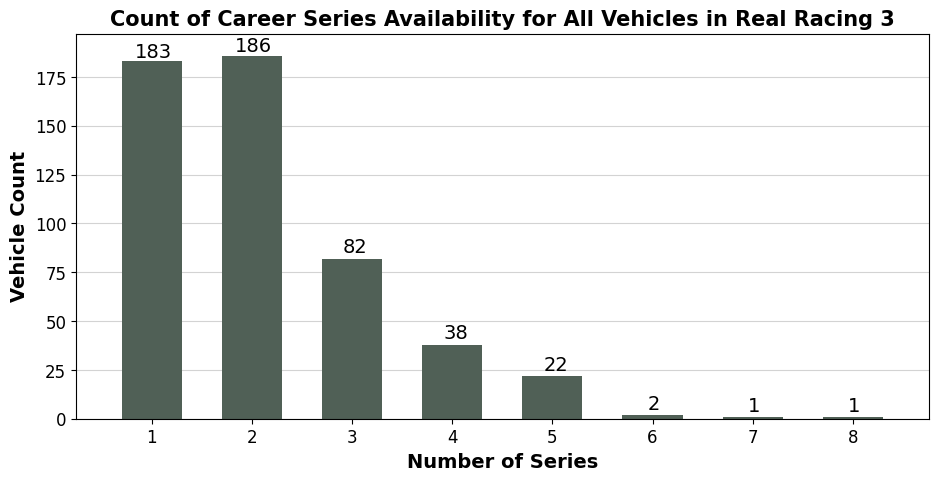

In [39]:
series_count = rr3_df.groupby('Series')['Model'].count()
plt.figure(figsize=(11,5))
plt.bar(range(1,9), series_count, color='#506056', width=0.6, zorder=2)
plt.title('Count of Career Series Availability for All Vehicles in Real Racing 3', fontsize=15, fontweight='bold')
plt.xlabel('Number of Series', fontsize=14, fontweight='bold')
plt.ylabel('Vehicle Count', fontsize=14, fontweight='bold')
for i in range(1,len(series_count)+1):
    if series_count[i] >= 100:   plt.text(i-0.17, series_count[i]+2, "{:3}".format(series_count[i]), fontsize=14)
    elif series_count[i] >= 10:   plt.text(i-0.09, series_count[i]+3, "{:2}".format(series_count[i]), fontsize=14)
    else:   plt.text(i-0.05, series_count[i]+3, series_count[i], fontsize=14)
plt.grid(axis='y', color='#d3d3d3', zorder=1)
plt.margins(0.06)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

With many settings for full proper visualization in the figure, here's the **bar chart**!

We can claim that **more than 350** vehicles can be driven in only **1 or 2 career series**. Are they worth buying and upgrading? Hmmm, maybe, if they also have their own **exclusive events**. By the way, the rest looks like more preferable to own and upgrade, though. Ah, if you ever wonder which vehicle has **6**, **7** or **8 different career series** for driving, let me reveal them for you!

In [41]:
rr3_df[rr3_df['Series'] >= 6]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,In Season 2,In Season 3
34,Audi,R8 LMS Ultra,50.5,315,3.5,30.8,1.30,R,MR,6,366300 Rdollar,160,1302,Yes,Yes,Yes,No,No,No
329,Lamborghini,Huracan LP610-4,50.7,325,3.2,30.8,1.17,S,M4,6,450 Gold,90,1377,Yes,No,No,No,Yes,No
430,Pagani,Zonda R,74.0,351,2.7,29.3,1.62,S,MR,7,400 Gold,280,1965,Yes,Yes,Yes,No,Yes,No
455,Porsche,918 Spyder Concept,60.2,322,3.0,30.2,1.40,S,M4,8,845000 Rdollar,215,1605,Yes,No,Yes,No,Yes,No


Unlike the previous revisions of the data analysis, it is nice to see that there is **no vehicle** not having any career series (sum these numbers above, it must match the total number). Some time ago, **F1 Debut Car** (a.k.a F1 Academy Car) was found as the only one with no series, just the daily races in F1 section. Now, you are able to drive it through the **F1 Exhibition Events**, especially to get you prepared for more challenging events with real F1 cars.

### **OK, folks! That's enough for 2nd part of my Real Racing 3 data analysis!**

**I believe we have gained more knowledge on vehicles available in this game and hope that you enjoyed a lot! I promise that there will be lots of visualizations through in the next part of my analysis. You know any graph could explain a thousand words than the statements here, right?** 

# **Stay tuned and as always, keep racing!**

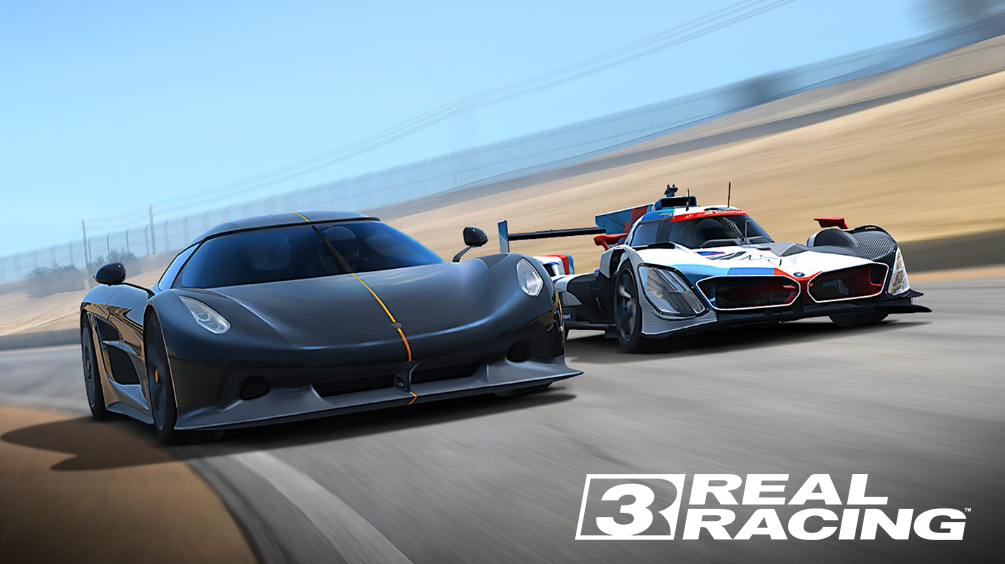